# Topics Covered :
* 1 - Kmeans Clustering
* 2 - Agglomerative Clustering
* 3 - DBSCAN
* 4 - Nearest Neighbour

# Import Libraries :

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage,cophenet,dendrogram
np.set_printoptions(suppress=True) # Avoid the number in exponent form
from sklearn.metrics.pairwise import euclidean_distances

In [4]:
data = pd.read_csv("tsne_scores.csv")
data.head()

,t-SNE-1,t-SNE-2
0,10.846841,-16.712580
1,24.794334,-16.775398
2,2.953309,13.379048
3,27.262146,-31.886690
4,-23.015728,64.468376


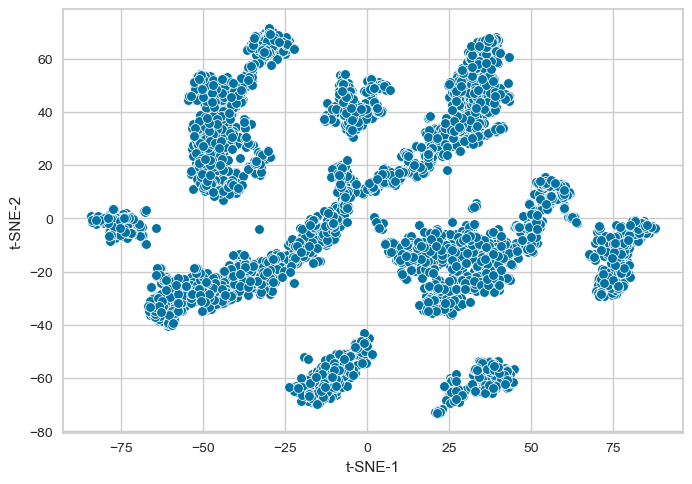

In [5]:
sns.scatterplot(data=data,x=data["t-SNE-1"],y=data["t-SNE-2"]);

# K_Means Clustering :

In [6]:
# scale the data
sc = StandardScaler()
data_c = sc.fit_transform(data)
data_c = pd.DataFrame(data_c,columns=data.columns)
data_c.head()

,t-SNE-1,t-SNE-2
0,0.250626,-0.505283
1,0.590684,-0.507034
2,0.058171,0.333471
3,0.650853,-0.928237
4,-0.574990,1.757502


In [7]:
# To Identify the number of cluster(value of K):
# 1-Elbow Plot
# 2-Silhouette Score  

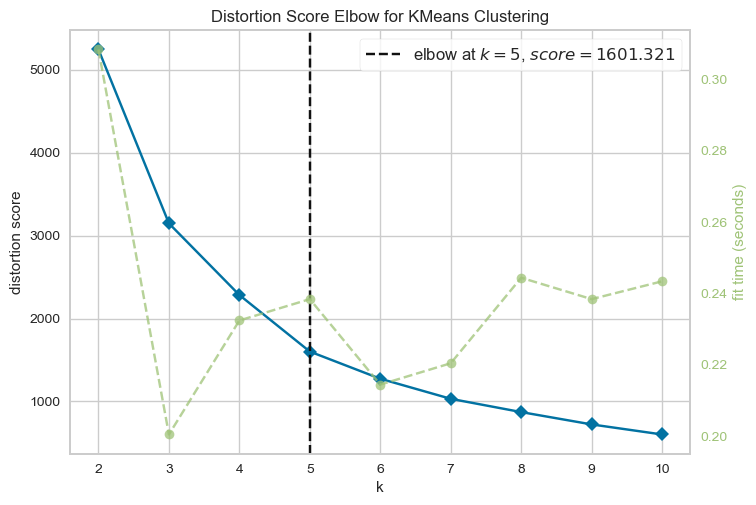

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
K_elbow = KElbowVisualizer(KMeans(),k=10)
K_elbow.fit(data_c)
K_elbow.show()

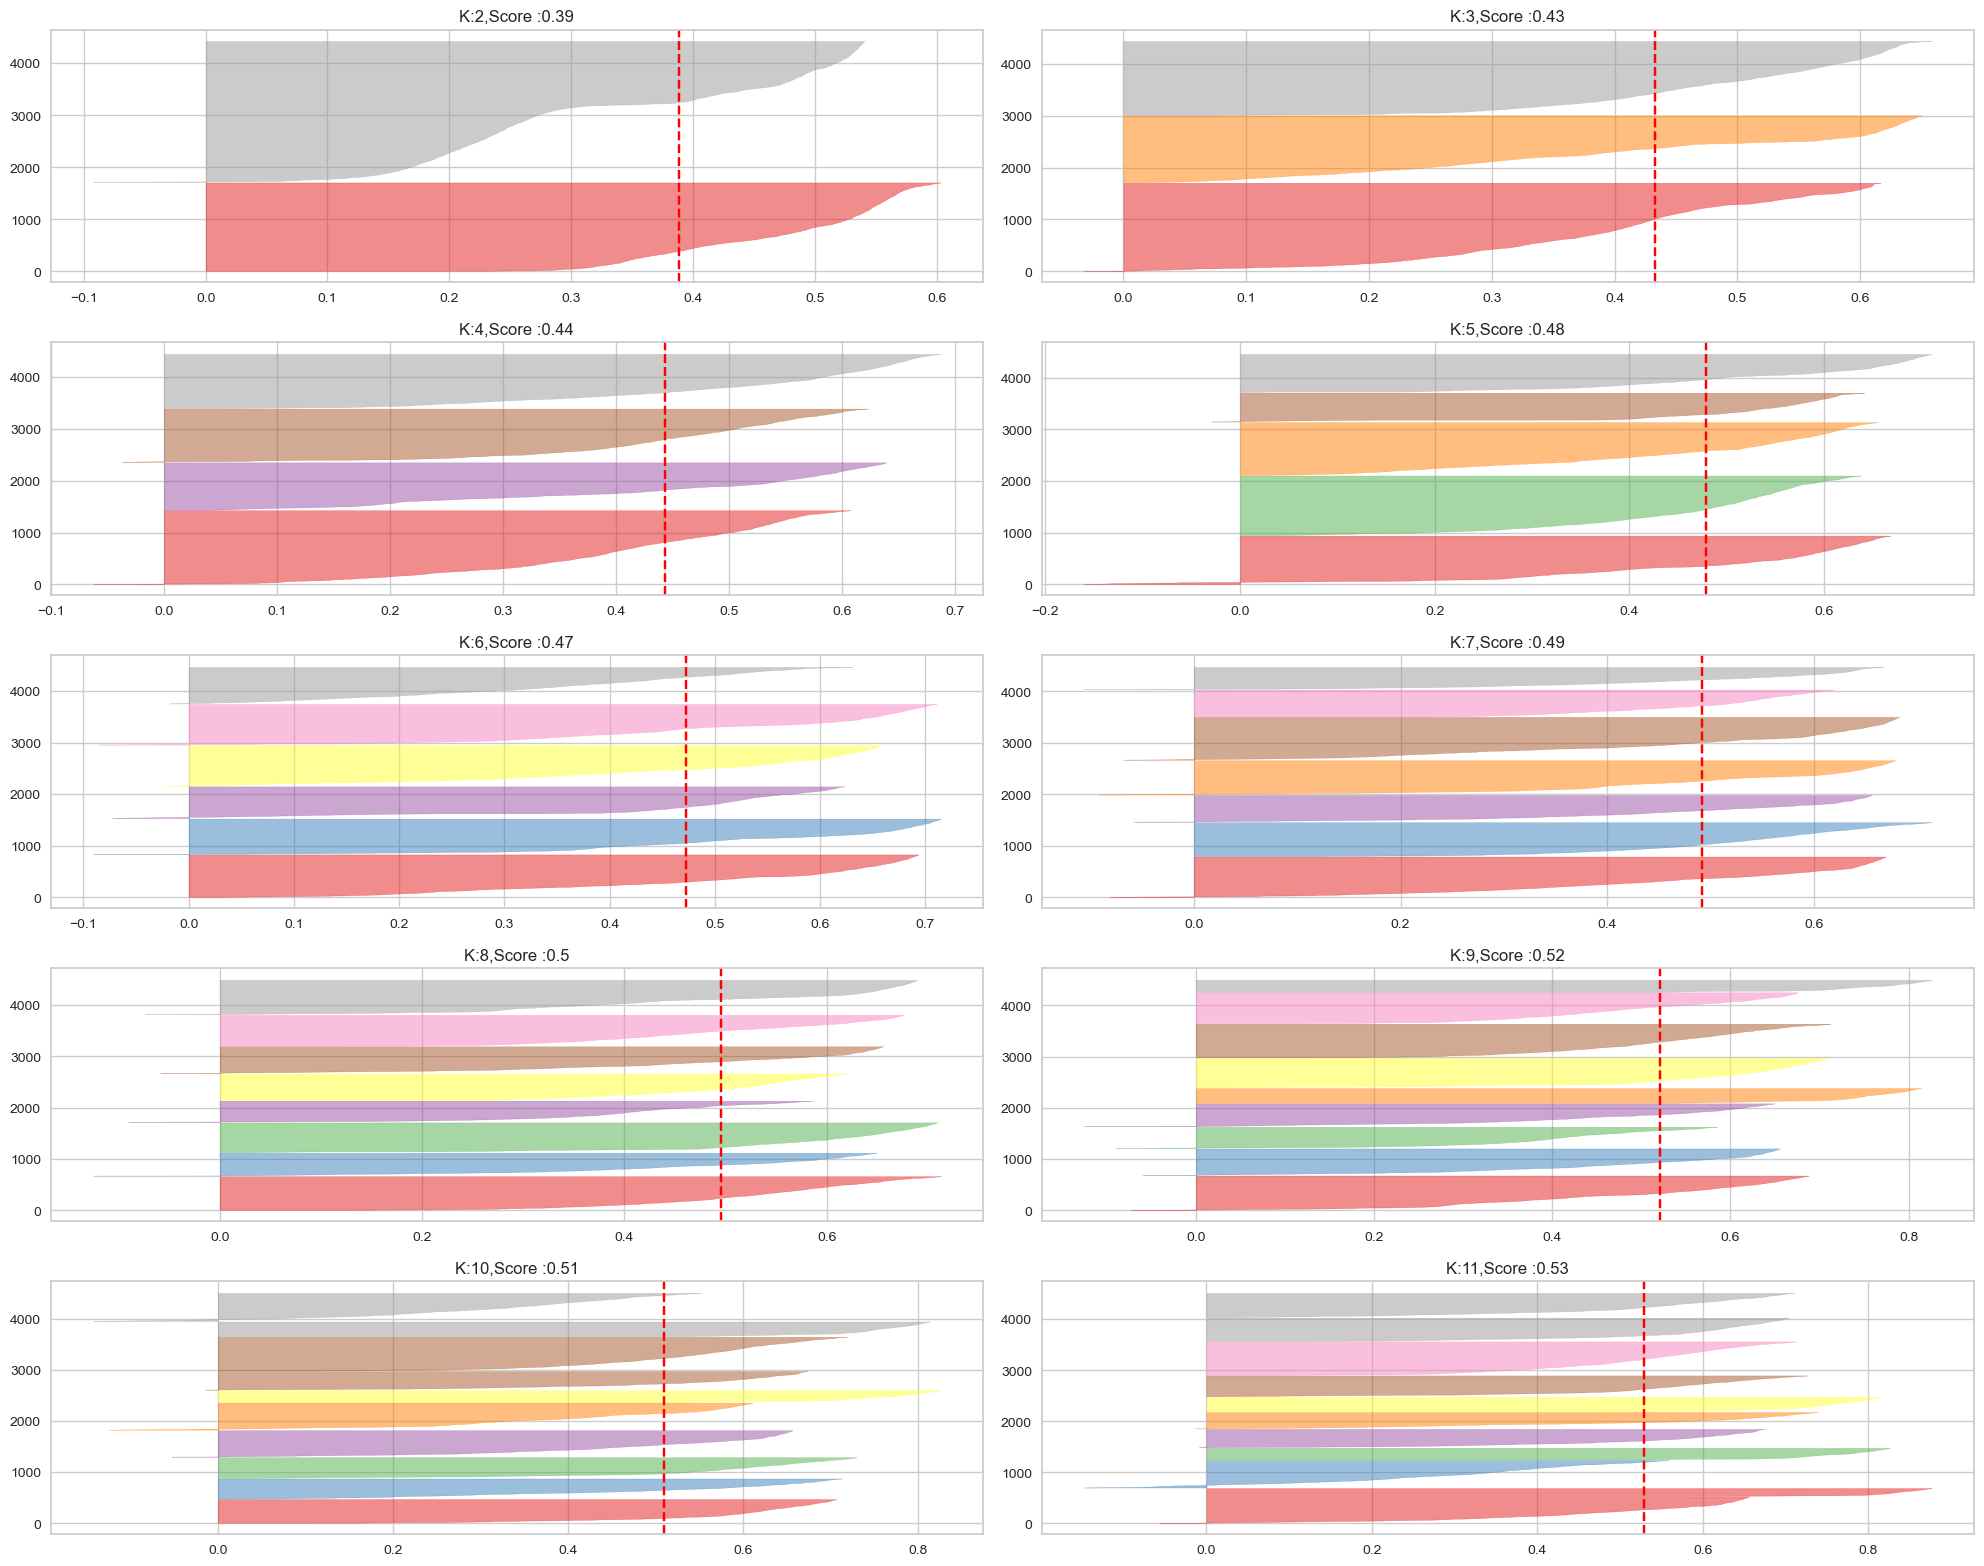

In [9]:
# Better way to Visualize the Silhouette Score is by YellowBrick :
t = 1
plt.figure(figsize=(20,25))
for i in range(2,12,t):
    plt.subplot(8,2,t)
    model = KMeans(n_clusters=i)
    sil_viz = SilhouetteVisualizer(model)
    sil_viz.fit(data_c)
    plt.title(f"K:{i},Score :{np.round(sil_viz.silhouette_score_,2)}")
    t+=1
plt.tight_layout()
plt.show()

In [10]:
# It is very hard to decide the Value of K in this case ,mainly because of the shape of clusters.
# Even if we go with k=8,lets see what type of cluster we end with.

In [11]:
finak_kmeans = KMeans(n_clusters=8)
data["Pred_kmeans"] = finak_kmeans.fit_predict(data)
data.head()

,t-SNE-1,t-SNE-2,Pred_kmeans
0,10.846841,-16.712580,1
1,24.794334,-16.775398,1
2,2.953309,13.379048,7
3,27.262146,-31.886690,1
4,-23.015728,64.468376,2


In [12]:
centroids = finak_kmeans.cluster_centers_
centroids

array([[-10.66324346, -58.41403038],
       [ 26.7306856 , -17.29302595],
       [-41.00370144,  37.95807404],
       [-55.22488717, -20.5434275 ],
       [ 20.82944543,  42.25253825],
       [ 67.27838538,  -7.09371677],
       [ 33.20559659, -62.445542  ],
       [-10.55661668,   0.43589114]])

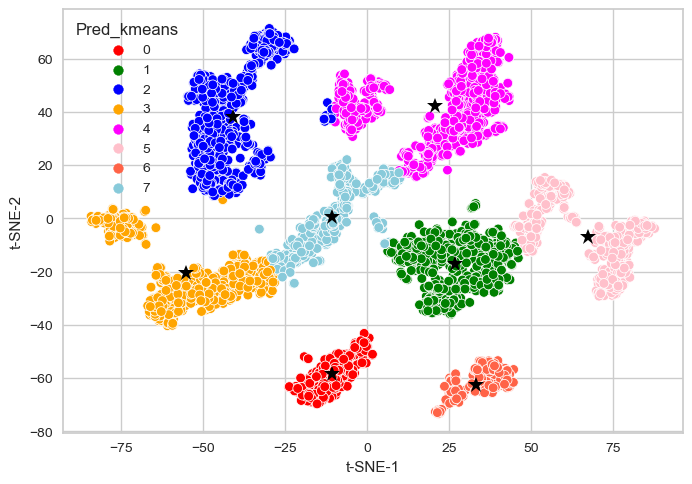

In [13]:
sns.scatterplot(x=data["t-SNE-1"],y = data["t-SNE-2"],hue=data["Pred_kmeans"],palette=["red","green","blue",
                                                                                       "orange","magenta","pink","tomato","c"]);
for i in range(8):
    plt.plot(centroids[i][0],centroids[i][1],color="black",marker="*",ms=12)

# Agglomerative Clustering :

In [14]:
# lets create a linkage matrix
link_mat_single=linkage(data,method="single")

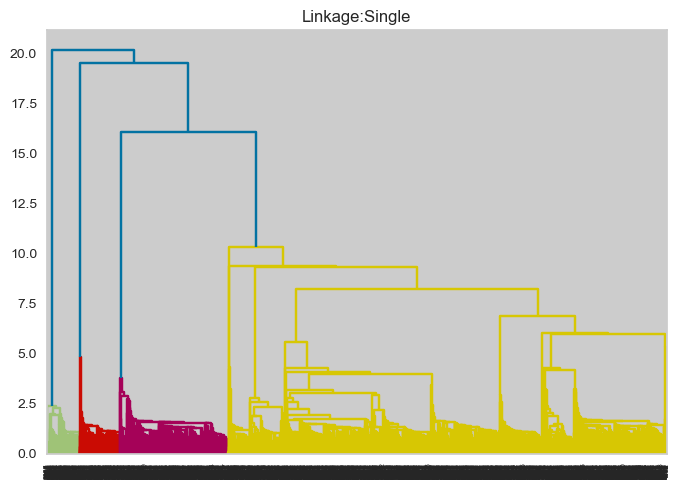

In [15]:
# lets create a dendogram:
plt.title("Linkage:Single")
dendrogram(link_mat_single)
plt.show()

In [16]:
for i in range(2,20):
    model = AgglomerativeClustering(n_clusters=i,linkage="ward")
    pred = model.fit_predict(data)
    print("K =",i,":",silhouette_score(data,pred))

K = 2 : 0.3659091245833556
K = 3 : 0.34193302434204403
K = 4 : 0.37122822405230516
K = 5 : 0.39594914118775715
K = 6 : 0.4542963232880307
K = 7 : 0.4643139099738718
K = 8 : 0.4819233686937713
K = 9 : 0.5157893056296197
K = 10 : 0.5092519415787582
K = 11 : 0.5243569520611144
K = 12 : 0.540212707549216
K = 13 : 0.5429673552255718
K = 14 : 0.5450277008978955
K = 15 : 0.5347670381406718
K = 16 : 0.517248993447728
K = 17 : 0.5055553365720279
K = 18 : 0.5036154751463566
K = 19 : 0.5107774431301059


In [17]:
# lets create a linkage matrix
link_mat_ward=linkage(data,method="ward")

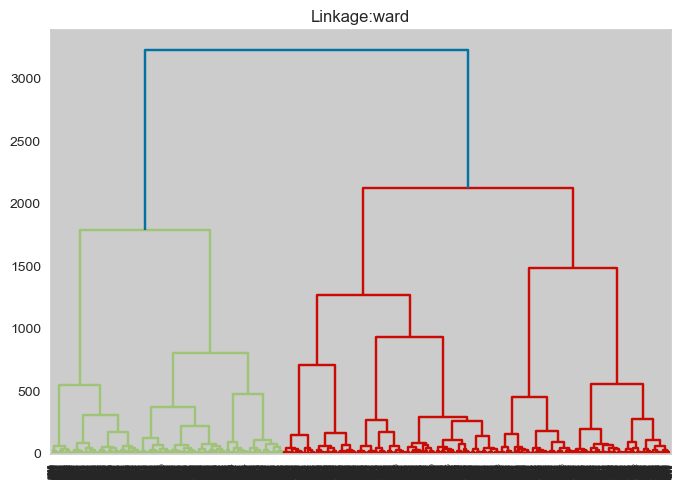

In [18]:
# lets create a dendogram:
plt.title("Linkage:ward")
dendrogram(link_mat_ward)
plt.show()

In [19]:
for i in range(2,20):
    model = AgglomerativeClustering(n_clusters=i,linkage="single")
    pred = model.fit_predict(data)
    print("K =",i,":",silhouette_score(data,pred))

K = 2 : 0.19654383802609435
K = 3 : 0.16389622768176448
K = 4 : 0.15658942008236873
K = 5 : 0.013741481983440563
K = 6 : 0.07725720151130562
K = 7 : 0.03131978670519013
K = 8 : 0.15692389959211278
K = 9 : 0.1780819291860646
K = 10 : 0.09759049905136645
K = 11 : 0.0760599230176774
K = 12 : 0.051113368953227455
K = 13 : 0.03934760005277755
K = 14 : 0.00019505426585085092
K = 15 : -0.021256933517180242
K = 16 : -0.03580984671682449
K = 17 : -0.06270032092706102
K = 18 : -0.06673919907031571
K = 19 : -0.013052672689256884


In [20]:
agglo_final = AgglomerativeClustering(n_clusters=9,linkage="single")
agglo_final

AgglomerativeClustering(linkage='single', n_clusters=9)

In [21]:
data["agglo_pred"] = agglo_final.fit_predict(data[["t-SNE-1","t-SNE-2"]])
data.head()

,t-SNE-1,t-SNE-2,Pred_kmeans,agglo_pred
0,10.846841,-16.712580,1,0
1,24.794334,-16.775398,1,0
2,2.953309,13.379048,7,1
3,27.262146,-31.886690,1,0
4,-23.015728,64.468376,2,3


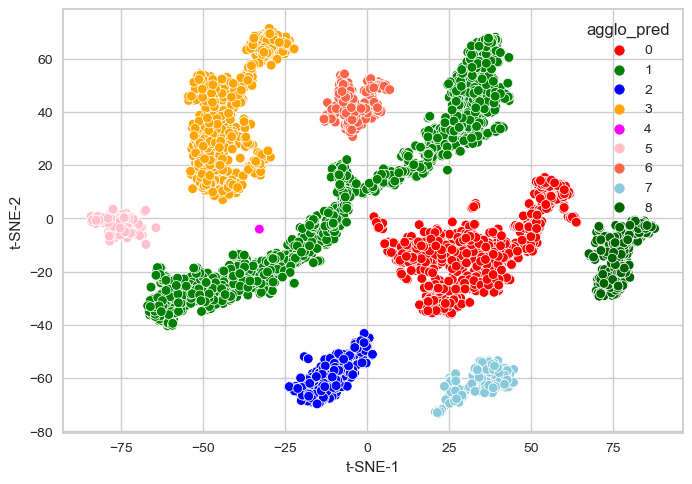

In [22]:
sns.scatterplot(x=data["t-SNE-1"],y = data["t-SNE-2"],hue=data["agglo_pred"],palette=["red","green","blue",
                                                                "orange","magenta","pink","tomato","c","darkgreen"]);

* in this data there is a variation between the datapoints on the basis of density
* There are non aliptical / irregular shapes in the Scatterplot
* Kmeans and Aggloromative clustering they make clusters on the basis of closeness in the datapoints(apthough we are forming better cluster with agglo and linkage = "Single")
* we need some different Algorithm for this type of clustering ,we can try density based ckustering (DBSCAN) for this Dataset.

# DBSCAN :

In [150]:
data1 = pd.read_csv("tsne_scores.csv")

In [151]:
dist_matirx = euclidean_distances(data1)
actual_distance = dist_matirx[np.triu_indices(4406,k=1)]
print(actual_distance.shape)

(9704215,)


In [152]:
actual_distance.sort()

In [153]:
actual_distance

array([  0.0054063 ,   0.00578476,   0.00893038, ..., 171.7533989 ,
       171.93027383, 171.97392308])

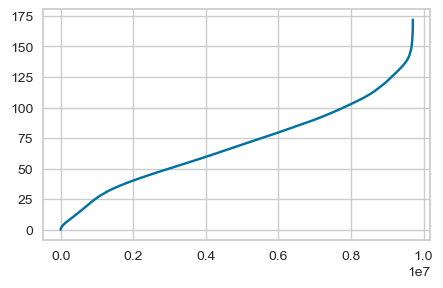

In [154]:
plt.figure(figsize=(5,3))
plt.plot(actual_distance)
plt.show()

In [94]:
# elsilon = 5 till 20
# min samples = 5 to 15

epsilon = range(2,7)
min_samples = range(9,20)

for e in epsilon:
    for m in min_samples:
        model = DBSCAN(eps=e,min_samples=m)
        pred = model.fit_predict(data1)
        sil = silhouette_score(data,pred)
        print(f"Epsilon:{e},min_samples:{m},silhouette_score:{round(sil,2)}")

Epsilon:2,min_samples:9,silhouette_score:0.07
Epsilon:2,min_samples:10,silhouette_score:0.16
Epsilon:2,min_samples:11,silhouette_score:0.16
Epsilon:2,min_samples:12,silhouette_score:0.18
Epsilon:2,min_samples:13,silhouette_score:0.18
Epsilon:2,min_samples:14,silhouette_score:0.12
Epsilon:2,min_samples:15,silhouette_score:0.08
Epsilon:2,min_samples:16,silhouette_score:-0.02
Epsilon:2,min_samples:17,silhouette_score:-0.09
Epsilon:2,min_samples:18,silhouette_score:-0.22
Epsilon:2,min_samples:19,silhouette_score:-0.33
Epsilon:3,min_samples:9,silhouette_score:0.03
Epsilon:3,min_samples:10,silhouette_score:0.03
Epsilon:3,min_samples:11,silhouette_score:0.04
Epsilon:3,min_samples:12,silhouette_score:0.11
Epsilon:3,min_samples:13,silhouette_score:0.07
Epsilon:3,min_samples:14,silhouette_score:0.33
Epsilon:3,min_samples:15,silhouette_score:0.25
Epsilon:3,min_samples:16,silhouette_score:0.25
Epsilon:3,min_samples:17,silhouette_score:0.33
Epsilon:3,min_samples:18,silhouette_score:0.32
Epsilon:3,m

In [155]:
# epsilon = 6 AND min sample =10:
final_dbscan=DBSCAN(eps=6,min_samples=10)

In [156]:
data1["pred_dbscan"]= final_dbscan.fit_predict(data1)

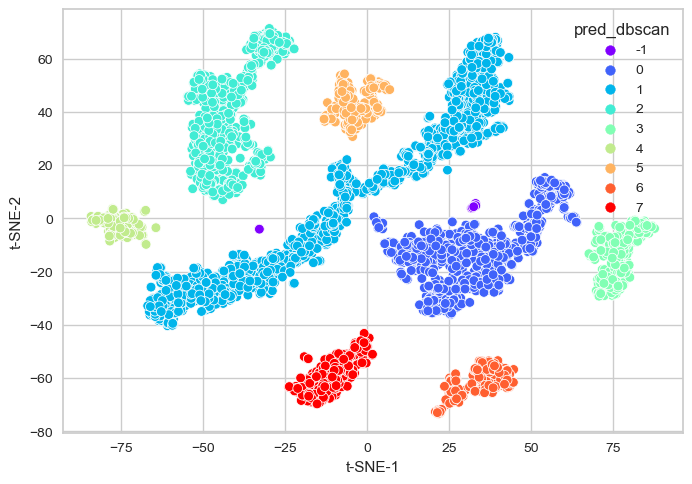

In [157]:
sns.scatterplot(x=data1["t-SNE-1"],y = data1["t-SNE-2"],hue=data1["pred_dbscan"],palette="rainbow",legend="full");

In [158]:
data1["pred_dbscan"].value_counts()

 1    1525
 0     881
 2     769
 3     301
 7     289
 5     246
 6     232
 4     153
-1      10
Name: pred_dbscan, dtype: int64

# 2nd Approach :

In [132]:
from sklearn.neighbors import NearestNeighbors

In [133]:
data2 = pd.read_csv("tsne_scores.csv")

In [134]:
neighnours = NearestNeighbors(n_neighbors=2)
neighnours.fit(data2)

NearestNeighbors(n_neighbors=2)

In [135]:
distances,indices = neighnours.kneighbors(data2)

In [136]:
dist = sorted(distances[:,1])

In [137]:
dist

[0.005406299288793922,
 0.005406299288793922,
 0.005784760064163913,
 0.005784760064163913,
 0.008930382130681211,
 0.008930382130681211,
 0.01272084022381559,
 0.01272084022381559,
 0.01321620917661748,
 0.01321620917661748,
 0.015088863377006562,
 0.015088863377006562,
 0.017807383889835948,
 0.017807383889835948,
 0.01900002844735078,
 0.01900002844735078,
 0.019894034176354703,
 0.019894034176354703,
 0.020141748111821147,
 0.020141748111821147,
 0.021391302204400036,
 0.021391302204400036,
 0.021814242411781818,
 0.021814242411781818,
 0.02370853776090056,
 0.02370853776090056,
 0.025070652683966365,
 0.025070652683966365,
 0.0256947171613158,
 0.0256947171613158,
 0.025711059410298182,
 0.025711059410298182,
 0.026503538178889955,
 0.026503538178889955,
 0.027344478418864497,
 0.027344478418864497,
 0.02784968082402382,
 0.02784968082402382,
 0.027961327936991544,
 0.027961327936991544,
 0.029362773302262318,
 0.029362773302262318,
 0.0315885085751123,
 0.0315885085751123,
 0.032

In [127]:
distances

array([[0.        , 0.66741467],
       [0.        , 1.19723352],
       [0.        , 0.46740745],
       ...,
       [0.        , 0.24222288],
       [0.        , 0.50392456],
       [0.        , 0.31072181]])

In [125]:
indices

array([[   0, 2164],
       [   1, 1879],
       [   2,  343],
       ...,
       [4403,  300],
       [4404, 1159],
       [4405,  373]], dtype=int64)

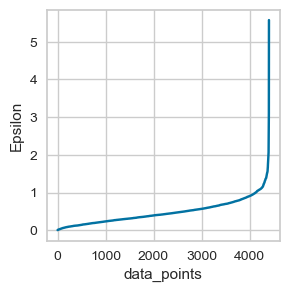

In [141]:
# K-Neighbour Plot:
plt.figure(figsize=(3,3))
plt.plot(dist)
plt.xlabel("data_points")
plt.ylabel("Epsilon")
plt.show()